# Image Classification

- CIFAR 10 Dataset (In-built)

#### CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. 
These images are divided into a training set of 50,000 images and a test set of 10,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Step 1: Import necessary libraries

In [9]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### Step 2: Load and preprocess the CIFAR-10 dataset

In [10]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 3: Create a deep learning model

In [11]:
# Create a deep learning model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

### Step 4: Compile the model

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 5: Train the model

In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.3729 - loss: 1.7029 - val_accuracy: 0.5698 - val_loss: 1.2039
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5974 - loss: 1.1342 - val_accuracy: 0.6205 - val_loss: 1.0694
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6596 - loss: 0.9708 - val_accuracy: 0.6719 - val_loss: 0.9280
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6963 - loss: 0.8635 - val_accuracy: 0.6866 - val_loss: 0.9023
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7285 - loss: 0.7854 - val_accuracy: 0.6901 - val_loss: 0.8863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7520 - loss: 0.7096 - val_accuracy: 0.6964 - val_loss: 0.8678
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7634 - loss: 0.6827 - val_accuracy: 0.7118 - val_loss: 0.8452
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7774 -

### Step 6: Evaluate the model

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6990 - loss: 0.9236
Test accuracy: 0.7009999752044678


### Step 7: Visualize training history

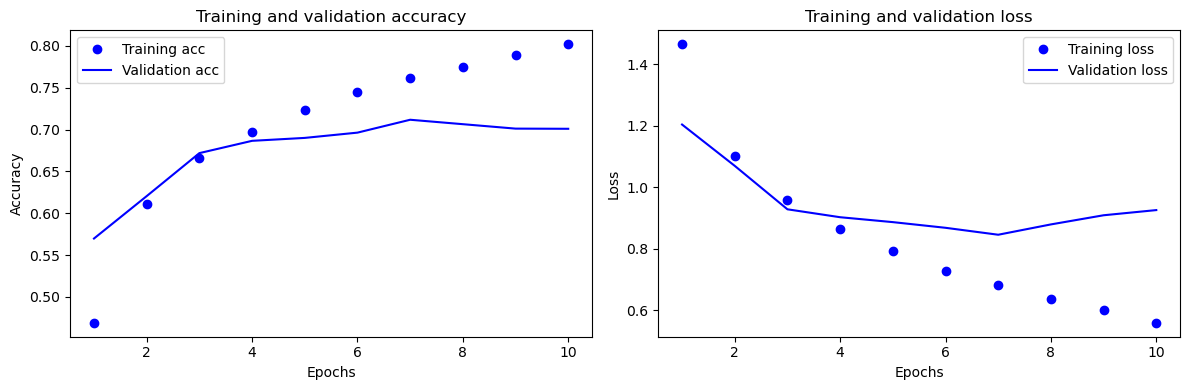

In [15]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

### Step 8: Visualize example predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


'num_rows = 5\nnum_cols = 5\nnum_images = num_rows*num_cols\nplt.figure(figsize=(2*2*num_cols, 2*num_rows))\nfor i in range(num_images):\n  plt.subplot(num_rows, 2*num_cols, 2*i+1)\n  plot_image(i, predictions[i], test_labels, test_images)\n  plt.subplot(num_rows, 2*num_cols, 2*i+2)\n  plot_value_array(i, predictions[i], test_labels)\nplt.tight_layout()\nplt.show()'

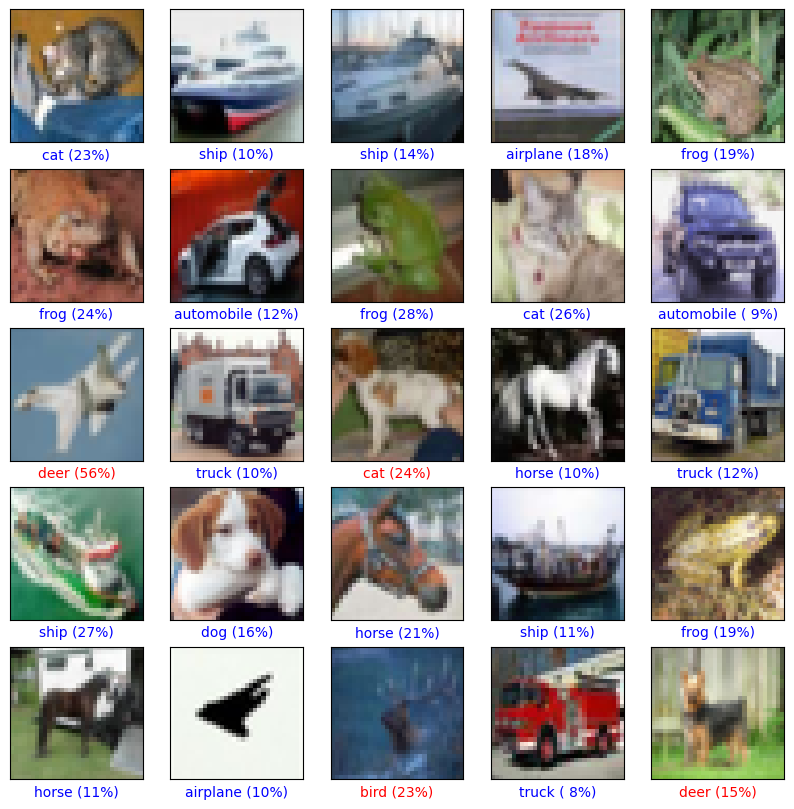

In [38]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 / np.max(predictions[i]):2.0f}%)", color=color)
        

# Call the function to plot example predictions
plot_example_predictions()



